In [148]:
import pystan
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
multiprocessing.set_start_method("fork", force=True)

from orbit.utils.stan import get_compiled_stan_model_simplified, compile_stan_model_simplified
from orbit.utils.dataset import load_iclaims
import arviz as az

In [113]:
ss_model_path = "./stan/ss_local_level.stan"
compiled_path = compile_stan_model_simplified(ss_model_path)
ss_mod = get_compiled_stan_model_simplified(compiled_path)
del compiled_path

In [114]:
# fake data
# np.random.seed(2022)
# x = np.random.normal(0, 0.2, 100)
# y = np.cumsum(x) + np.random.normal(0, 1.0, 100)
# y = (y - np.mean(y))/np.std(y)

In [151]:
raw_data = load_iclaims()
y = raw_data['claims']
y = (y - np.mean(y))/np.std(y)

In [158]:
data = {
    'N': len(y),
    'Y' : y,
    'SD_Y' : 1.0,
    'A1' : y[0],
    'P1' : 1.0,
    'STATE_SIGMA_MEAN': 0.1,
    'STATE_SIGMA_SD': 1.0,
    'OBS_SIGMA_MEAN': 0.8,
    'OBS_SIGMA_SD': 1.0,
}

In [159]:
ss_fit = ss_mod.sampling(
    data=data,
    warmup=4000,
    iter=5000,
    chains=4,
)


Gradient evaluation took 0.000122 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.22 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 5000 [  0%]  (Warmup)

Gradient evaluation took 0.000122 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.22 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 5000 [  0%]  (Warmup)

Gradient evaluation took 0.000136 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.36 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 5000 [  0%]  (Warmup)

Gradient evaluation took 0.000127 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.27 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 5000 [  0%]  (Warmup)
Iteration:  500 / 5000 [ 10%]  (Warmup)
Iteration:  500 / 5000 [ 10%]  (Warmup)
Iteration:  500 / 5000 [ 10%]  (Warmup)
Iteration:  500 / 5000 [ 10%]  (Warmup)
Iteration: 1000 / 5000 [

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


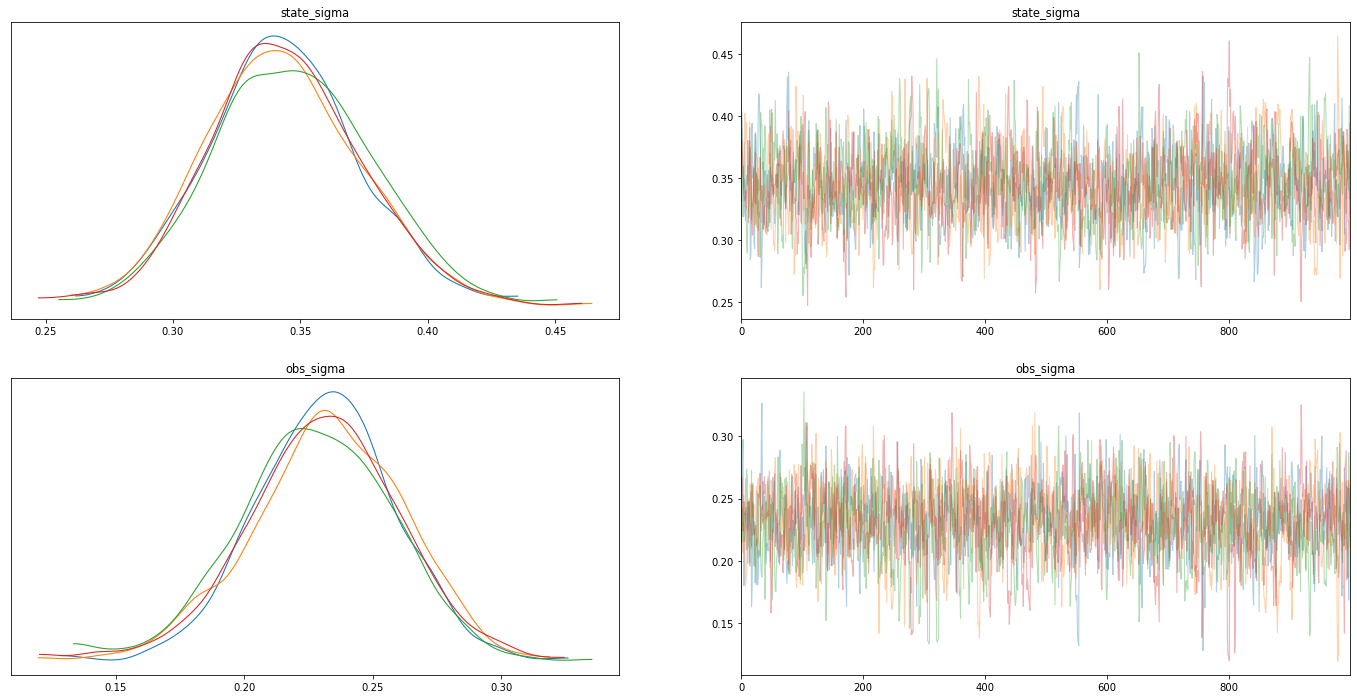

In [160]:
az_posteriors = az.from_pystan(ss_fit)
az.plot_trace(az_posteriors, var_names=['state_sigma', 'obs_sigma'], compact=False, figsize=(24, 12));

In [161]:
ss_posteriors = ss_fit.extract(pars=['state_sigma', 'states', 'obs_sigma'], permuted=False)
# states_mean = np.mean(ss_posteriors['states'], 0)

In [162]:
ss_posteriors = ss_fit.extract(pars=['state_sigma', 'states', 'obs_sigma'], permuted=True)
states_mean = np.mean(ss_posteriors['states'], 0)

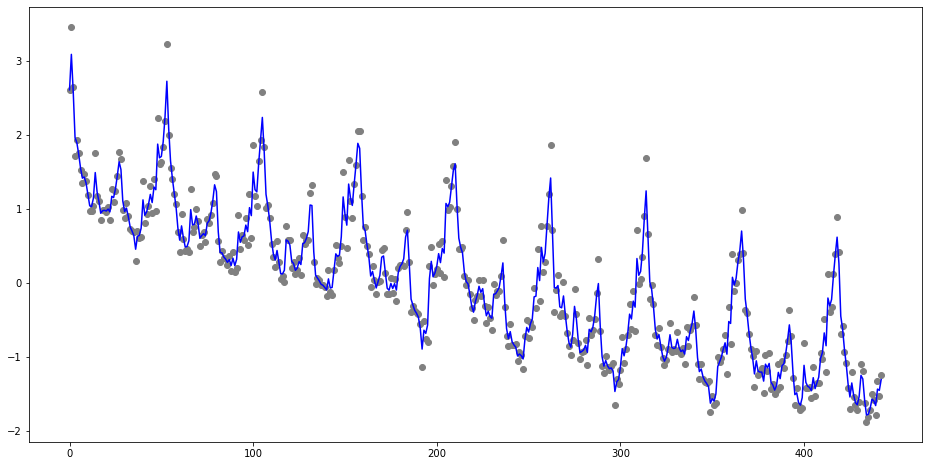

In [163]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
x = np.arange(0, len(y))
ax.scatter(x, y, c='grey')
ax.plot(x, states_mean[:-1], color='blue');

In [136]:
walker_model_path = "./stan/walker.stan"
compiled_path = compile_stan_model_simplified(walker_model_path)
walker_mod = get_compiled_stan_model_simplified(compiled_path)
del compiled_path

In [137]:
data = {
    'n' : len(y),
    'k' : 1,
    'xreg' : np.ones((1, len(y))),
    'y': y,
    'beta_mean' : np.zeros((1)),
    'beta_sd' : np.ones((1)),
    'sigma_mean': np.ones((2, )),
    'sigma_sd': np.ones((2, )),
    'n_new': 0,
    'xreg_new': np.ones((1, 0)),
}

In [143]:
walker_fit = walker_mod.sampling(
    data=data,
    warmup=4000,
    iter=5000,
    chains=4,
)


Gradient evaluation took 0.000812 seconds
1000 transitions using 10 leapfrog steps per transition would take 8.12 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.000338 seconds
1000 transitions using 10 leapfrog steps per transition would take 3.38 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.000374 seconds
1000 transitions using 10 leapfrog steps per transition would take 3.74 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.000556 seconds
1000 transitions using 10 leapfrog steps per transition would take 5.56 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 5000 [  0%]  (Warmup)
Iteration:    1 / 5000 [  0%]  (Warmup)
Iteration:    1 / 5000 [  0%]  (Warmup)
Iteration:    1 / 5000 [  0%]  (Warmup)


Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: Exception: multiply: A[1] is nan, but must not be nan!  (in 'unknown file name' at line 19)
  (in 'unknown file name' at line 99)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: Exception: multiply: A[1] is nan, but must not be nan!  (in 'unknown file name' at line 19)
  (in 'unknown file name' at line 99)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informationa

Iteration:  500 / 5000 [ 10%]  (Warmup)
Iteration:  500 / 5000 [ 10%]  (Warmup)
Iteration:  500 / 5000 [ 10%]  (Warmup)
Iteration:  500 / 5000 [ 10%]  (Warmup)
Iteration: 1000 / 5000 [ 20%]  (Warmup)
Iteration: 1000 / 5000 [ 20%]  (Warmup)
Iteration: 1000 / 5000 [ 20%]  (Warmup)
Iteration: 1000 / 5000 [ 20%]  (Warmup)
Iteration: 1500 / 5000 [ 30%]  (Warmup)
Iteration: 1500 / 5000 [ 30%]  (Warmup)
Iteration: 1500 / 5000 [ 30%]  (Warmup)
Iteration: 1500 / 5000 [ 30%]  (Warmup)
Iteration: 2000 / 5000 [ 40%]  (Warmup)
Iteration: 2000 / 5000 [ 40%]  (Warmup)
Iteration: 2000 / 5000 [ 40%]  (Warmup)
Iteration: 2000 / 5000 [ 40%]  (Warmup)
Iteration: 2500 / 5000 [ 50%]  (Warmup)
Iteration: 2500 / 5000 [ 50%]  (Warmup)
Iteration: 2500 / 5000 [ 50%]  (Warmup)
Iteration: 2500 / 5000 [ 50%]  (Warmup)
Iteration: 3000 / 5000 [ 60%]  (Warmup)
Iteration: 3000 / 5000 [ 60%]  (Warmup)
Iteration: 3000 / 5000 [ 60%]  (Warmup)
Iteration: 3000 / 5000 [ 60%]  (Warmup)
Iteration: 3500 / 5000 [ 70%]  (Warmup)


Iteration: 5000 / 5000 [100%]  (Sampling)

 Elapsed Time: 5.54262 seconds (Warm-up)
               1.27048 seconds (Sampling)
               6.8131 seconds (Total)



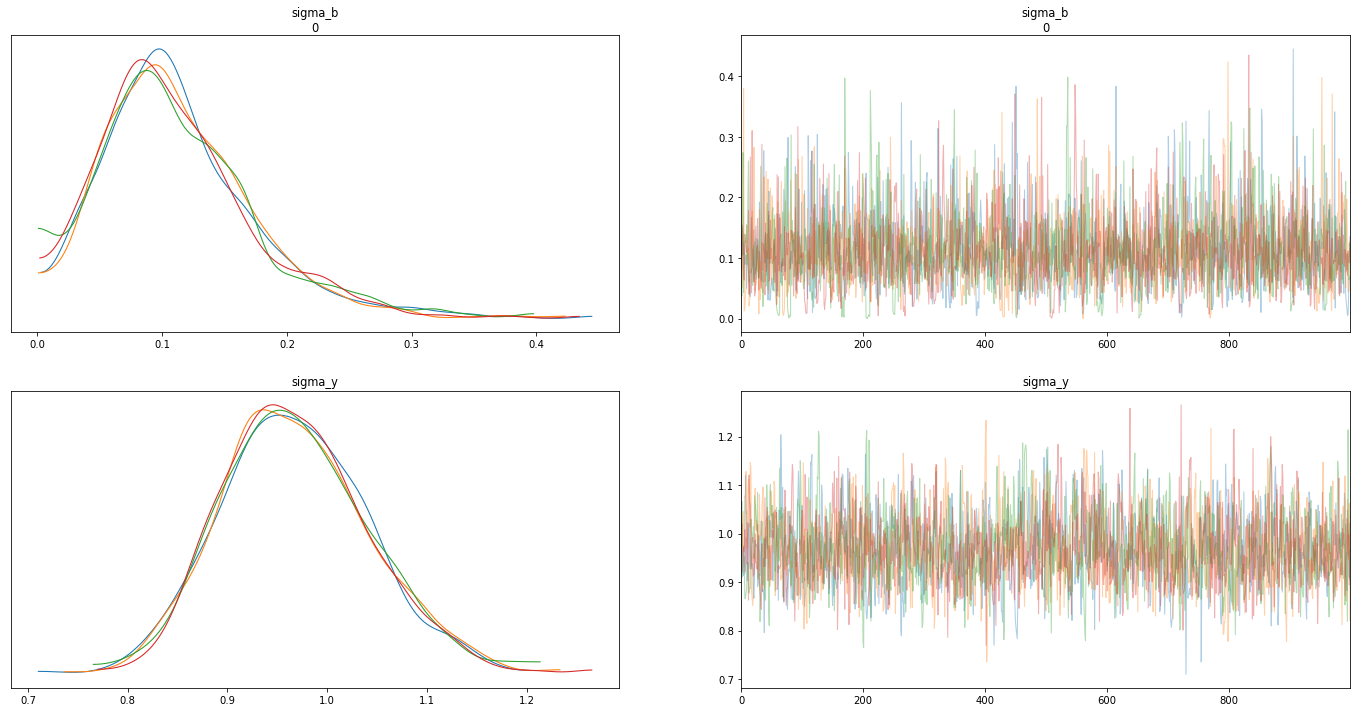

In [144]:
az_posteriors = az.from_pystan(walker_fit)
# converging
az.plot_trace(az_posteriors, var_names=['sigma_b', 'sigma_y'], compact=False, figsize=(24, 12));

In [145]:
posteriors = walker_fit.extract(permuted=True)

In [146]:
states_mean = posteriors['y_rep']
states_mean = np.mean(states_mean, 0)

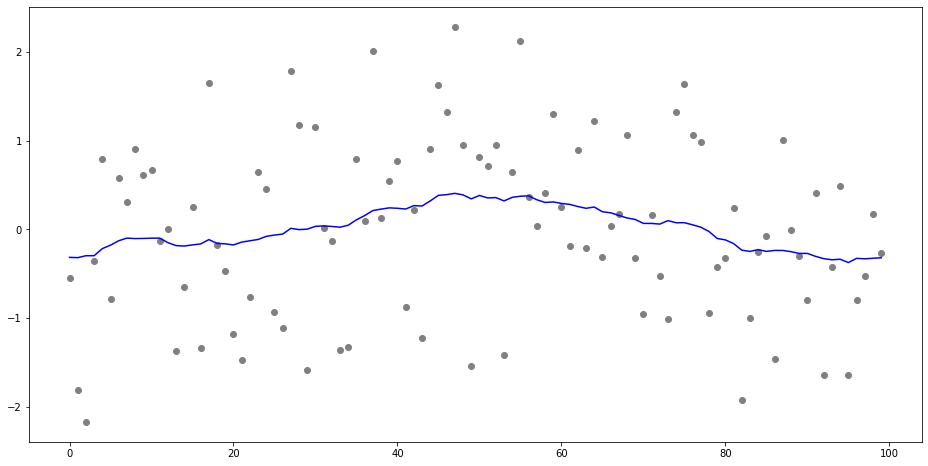

In [147]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
x = np.arange(0, len(y))
ax.scatter(x, y, c='grey')
ax.plot(x, states_mean, color='blue');